# Results

In [1]:
import os

import pandas as pd

import numpy as np

from sklearn import preprocessing

from scipy import stats
import scipy.stats as sc
from scipy.cluster.hierarchy import linkage,leaves_list

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from import_data import load_data

In [2]:
listVideo = load_data('../data_luc/video/')
    
nbVideos = len(listVideo)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))

   configurationID  H264  no_8x8dct  no_asm  no_cabac  no_deblock  \
0                1  True       True   False     False        True   
1               10  True       True   False      True       False   
2              100  True       True   False     False        True   
3             1000  True       True   False      True       False   
4             1001  True      False   False     False        True   

   no_fast_pskip  no_mbtree  no_mixed_refs  no_weightb  rc_lookahead  ref  \
0           True      False           True        True            20    9   
1           True      False          False        True            40    9   
2          False       True           True       False            40    1   
3           True       True           True       False            40    9   
4          False      False           True       False            60    5   

      size  usertime  systemtime  elapsedtime  
0  1718492   22.9416      0.2784       3.1876  
1  1962957   26.8176      

In [3]:
res_no_transfer = pd.read_csv("../data_luc/res/res_no_transfer_nb_conf_training.csv")
res_no_transfer = res_no_transfer.set_index('id_video')
nbConfig = np.array(res_no_transfer.columns, dtype=int)
res_no_transfer

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.315903,0.335105,0.274581,0.175285,0.123860,0.108373,0.082577,0.061107,0.043695
1,0.242384,0.276141,0.210945,0.181609,0.142979,0.129489,0.097385,0.081001,0.056462
2,0.253462,0.296613,0.227474,0.158061,0.130553,0.097945,0.089826,0.069445,0.053633
3,0.362272,0.325348,0.189328,0.153551,0.109045,0.095252,0.078965,0.066658,0.059151
4,0.259402,0.229292,0.190534,0.153408,0.117503,0.092549,0.055915,0.042847,0.031810
5,0.234331,0.257739,0.194140,0.190699,0.122641,0.104538,0.084439,0.048778,0.036180
6,0.297728,0.238203,0.230293,0.136081,0.074924,0.052311,0.048366,0.029014,0.021959
7,0.399790,0.270710,0.207764,0.114372,0.063635,0.049566,0.046428,0.032158,0.028625
8,0.240958,0.204356,0.211082,0.115455,0.084659,0.067447,0.057366,0.045624,0.034535


In [4]:
res_model_shift = pd.read_csv('../data_luc/res/res_model_shift_nb_conf_training.csv')
res_model_shift = res_model_shift.set_index('id_video')
res_model_shift

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.312710,0.416827,0.189843,0.141220,0.129560,0.128981,0.127956,0.127010,0.126667
1,0.328505,0.153304,0.104304,0.082732,0.079018,0.079200,0.074390,0.076045,0.073758
2,0.252018,0.343147,0.130415,0.108172,0.104484,0.100423,0.104150,0.099687,0.101011
3,0.300609,0.295016,0.121715,0.125547,0.104995,0.102928,0.103251,0.099997,0.101080
4,0.269439,0.179487,0.081027,0.067047,0.057816,0.060469,0.057710,0.059024,0.057457
5,0.262485,0.219838,0.104698,0.075014,0.071795,0.071217,0.071087,0.069273,0.069037
6,0.282295,0.292163,0.109365,0.077924,0.070873,0.071842,0.072115,0.070040,0.070858
7,0.296390,0.177827,0.100126,0.073921,0.069273,0.069830,0.067872,0.065425,0.067382
8,0.230296,0.327069,0.103912,0.074791,0.073396,0.078559,0.071226,0.072704,0.071556


In [5]:
res_full_transfer = pd.read_csv('../data_luc/res/res_full_transfer_nb_conf_training.csv')
res_full_transfer = res_full_transfer.set_index('id_video')
res_full_transfer

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.381831,0.245000,0.206339,0.142940,0.121627,0.118301,0.112956,0.107813,0.103298
1,0.314350,0.229346,0.155434,0.111734,0.082618,0.077235,0.074314,0.068944,0.068022
2,0.263529,0.201669,0.160946,0.122096,0.102832,0.106853,0.099301,0.092278,0.088058
3,0.325869,0.290111,0.169817,0.121811,0.111863,0.111999,0.108509,0.101723,0.100480
4,0.256643,0.192440,0.130676,0.100578,0.061538,0.057695,0.054965,0.051117,0.049644
5,0.358319,0.258510,0.147720,0.110506,0.074503,0.070219,0.069781,0.064842,0.058256
6,0.355080,0.227256,0.147638,0.099274,0.080971,0.073182,0.074833,0.066126,0.067239
7,0.329001,0.216066,0.132928,0.098729,0.070472,0.071630,0.067393,0.064983,0.061268
8,0.283508,0.210205,0.126677,0.095374,0.078289,0.074225,0.073162,0.070142,0.066204


In [6]:
res_full_transfer_reg = pd.read_csv('../data_luc/res/res_full_transfer_nb_conf_training_reg.csv')
res_full_transfer_reg = res_full_transfer_reg.set_index('id_video')
res_full_transfer_reg

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.344018,0.353637,0.171784,0.136037,0.128501,0.128282,0.131120,0.127002,0.127909
1,0.356241,0.179515,0.086147,0.080678,0.076736,0.075992,0.077971,0.074931,0.074509
2,0.330834,0.331010,0.118628,0.118023,0.101806,0.104206,0.100353,0.099339,0.101198
3,0.323463,0.347045,0.125693,0.110959,0.102289,0.104416,0.101062,0.100632,0.099967
4,0.258244,0.272494,0.074728,0.061068,0.059700,0.059334,0.058524,0.058307,0.057383
5,0.309928,0.247218,0.096982,0.073678,0.073097,0.071643,0.070094,0.070248,0.069081
6,0.373155,0.303521,0.119770,0.085841,0.070720,0.070962,0.072062,0.071608,0.069907
7,0.282871,0.149417,0.115992,0.071030,0.069393,0.067949,0.069751,0.068181,0.067478
8,0.270152,0.184248,0.105205,0.077020,0.079660,0.075698,0.071910,0.073248,0.070535


# When and how to use transfer learning?

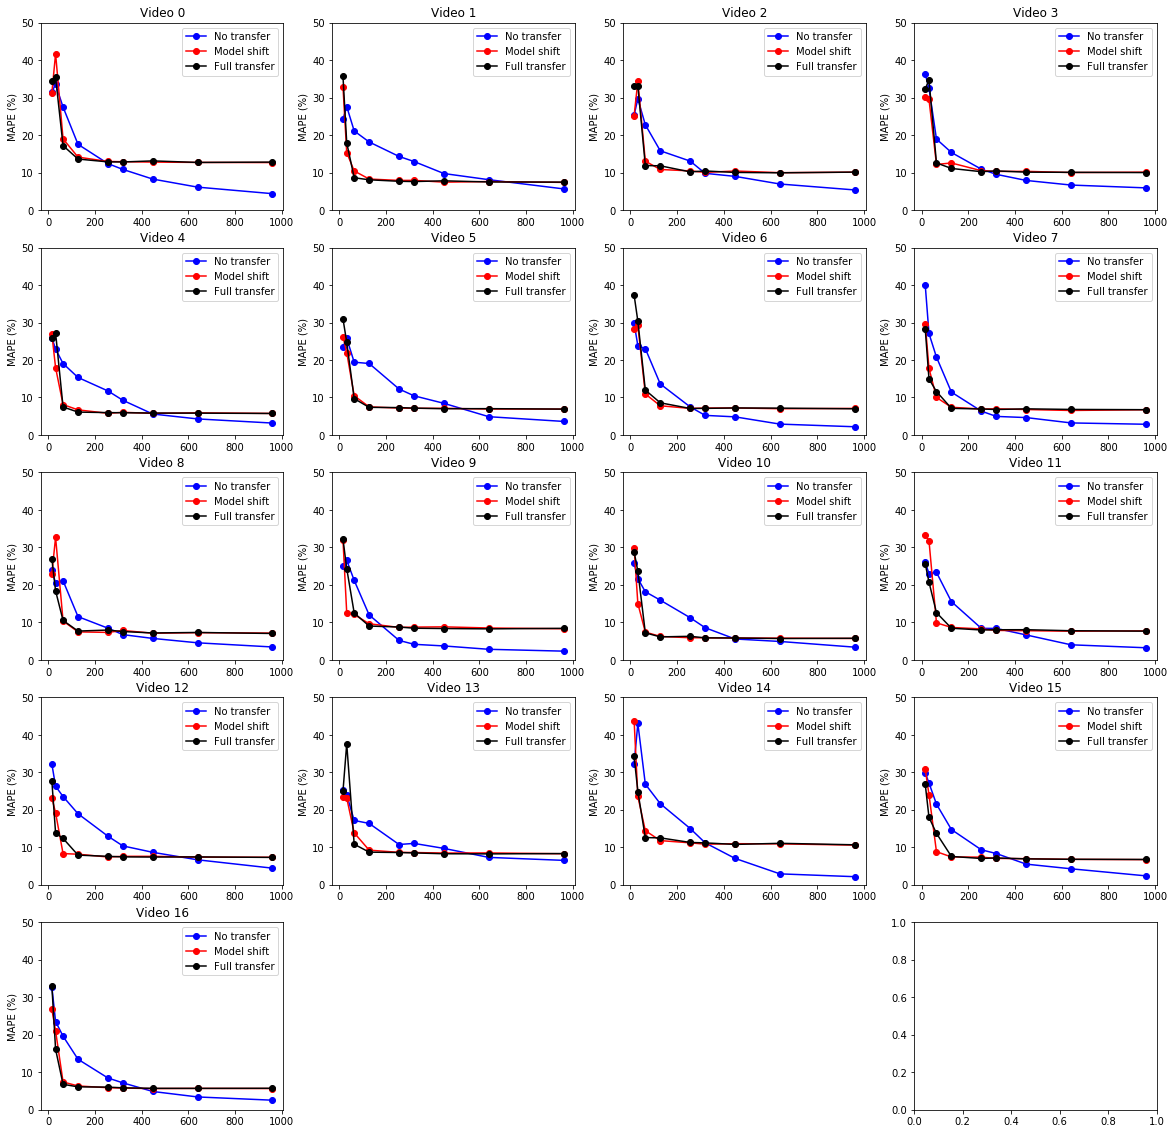

In [10]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,4,20)
for i in range(nbVideos):
    plt.subplot(5,4,i+1)
    plt.ylim((0,50))
    plt.ylabel('MAPE (%)')
    plt.plot(nbConfig, 100*res_no_transfer.iloc[i], 'o-', c='blue', label = 'No transfer')
    plt.plot(nbConfig, 100*res_model_shift.iloc[i], 'o-', c='red', label = 'Model shift')
    #plt.plot(nbConfig, 100*res_full_transfer.iloc[i], 'o-', c='green', label = 'Full transfer')
    plt.plot(nbConfig, 100*res_full_transfer_reg.iloc[i], 'o-', c='black', label = 'Full transfer')
    plt.legend()
    plt.title('Video '+str(i))
plt.show()